# Analýza údajov o nadváhe a obezite svetovej populácie

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Načítanie a zobrazenie dát z csv súboru 

In [2]:
obesity = pd.read_csv("prevalence-of-obesity-in-adults-by-region.csv")

In [3]:
obesity.head()

,Entity,Code,Year,Prevalence of obesity in adults (18+ years old) (FAO (2017)) (%)
0,Africa,NaN,1975,3.0
1,Africa,NaN,1976,3.1
2,Africa,NaN,1977,3.2
3,Africa,NaN,1978,3.3
4,Africa,NaN,1979,3.5


In [4]:
obesity.rename(columns={'Prevalence of obesity in adults (18+ years old) (FAO (2017)) (%)' : 'obesity_rate'}, inplace=True)

In [5]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
Entity          240 non-null object
Code            40 non-null object
Year            240 non-null int64
obesity_rate    240 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB


In [6]:
obesity.describe(include='all')

,Entity,Code,Year,obesity_rate
count,240,40,240.000000,240.000000
unique,6,1,NaN,NaN
top,Latin America and the Caribbean,OWID_WRL,NaN,NaN
freq,40,40,NaN,NaN
mean,NaN,NaN,1994.500000,11.003333
std,NaN,NaN,11.567521,6.957702
min,NaN,NaN,1975.000000,1.000000
25%,NaN,NaN,1984.750000,5.375000
50%,NaN,NaN,1994.500000,9.800000
75%,NaN,NaN,2004.250000,15.575000


In [7]:
obesity.Entity.unique()

array(['Africa', 'Asia', 'Latin America and the Caribbean',
       'North America and Europe', 'Oceania', 'World'], dtype=object)

## Výber dát pre Severnú Ameriku a Európu

In [8]:
df = obesity[obesity.Entity == 'North America and Europe']
df.head()

,Entity,Code,Year,obesity_rate
120,North America and Europe,NaN,1975,11.1
121,North America and Europe,NaN,1976,11.4
122,North America and Europe,NaN,1977,11.7
123,North America and Europe,NaN,1978,12.0
124,North America and Europe,NaN,1979,12.3


## Vizualizácia vývoja podielu obéznych ľudí v čase

### Pomocou knižnice `matplotlib`

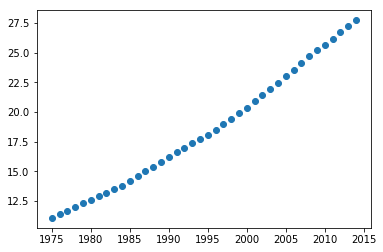

In [9]:
plt.scatter(df.Year, df.obesity_rate)

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.Year,df.obesity_rate)
line = slope * df.Year + intercept

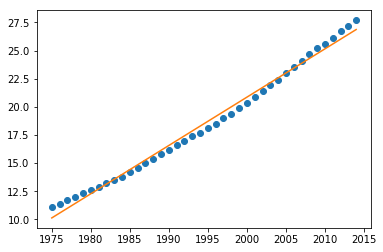

In [11]:
plt.plot(df.Year, df.obesity_rate, 'o', df.Year, line)

Predpoveď pre rok 2200:

In [12]:
slope * 2200 + intercept

106.74933395872426

### Pomocou knižnice `seaborn`

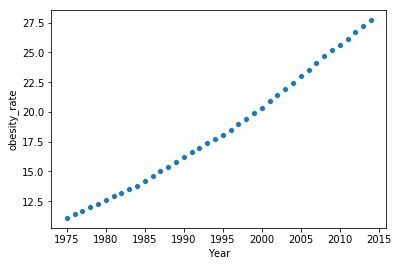

In [13]:
sns.scatterplot(df.Year, df.obesity_rate)

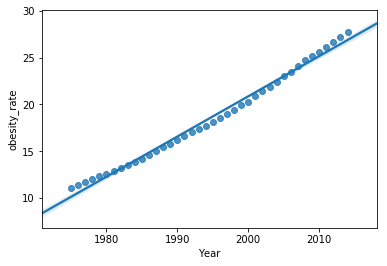

In [14]:
sns.regplot(df.Year, df.obesity_rate)